In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

In [110]:
data = pd.read_csv('/Users/rickie/Desktop/czbank_test/UCI_Credit_Card.csv')
data.rename(columns={'default.payment.next.month':'default'},inplace=True)
data.drop(['ID'],axis=1,inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [111]:
features=data.iloc[:,:23].values
target=data['default'].values
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=0.3)

In [112]:
classifiers=[
    RandomForestClassifier(),
    DecisionTreeClassifier(),
#     KNeighborsClassifier(),
    AdaBoostClassifier(),
    SVC()
]
classifier_names=[
    'randomforestclassifier',
    'decisiontreeclassifier',
#     'kneighborsclassifier',
    'adaboostclassidier',
    'supportvectorclassifier'
]

params=[
    {'randomforestclassifier__n_estimators':range(5,10)},
    {'decisiontreeclassifier__max_depth':range(5,10)},
#     {'kneighborsclassifier__n_neighbors':range(5,10)},
    {'adaboostclassidier__n_estimators':range(5,10)},
    {'supportvectorclassifier__C':range(1,10)}
]

def GridSearch_work(pipeline,train_x,train_y,test_x,test_y,param_grid,score = 'accuracy'):
#     response = {}
    clf=GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring = score)
    search=clf.fit(train_x,train_y)
    print('最优参数:',clf.best_params_)
    print('最优分数:%.4lf'%clf.best_score_)
    pred_y=clf.predict(test_x)
    print('准确率:%.4lf'%accuracy_score(test_y,pred_y))
#     response['pred_y'] = pred_y
#     response['accuracy_score'] = accuracy_score(test_y,pred_y)
#     return response

    
for model,model_name,param in zip(classifiers,classifier_names,params):
    pipeline=Pipeline([
        ('scaler',StandardScaler()),
        (model_name,model)
    ])
    result=GridSearch_work(pipeline,train_x,train_y,test_x,test_y,param,score = 'accuracy')


最优参数: {'randomforestclassifier__n_estimators': 8}
最优分数:0.8018
准确率:0.7970
最优参数: {'decisiontreeclassifier__max_depth': 5}
最优分数:0.8207
准确率:0.8149
最优参数: {'adaboostclassidier__n_estimators': 5}
最优分数:0.8218
准确率:0.8129
最优参数: {'supportvectorclassifier__C': 1}
最优分数:0.8210
准确率:0.8153


In [9]:
std=StandardScaler()
train_x_std=std.fit_transform(train_x)
test_x_std=std.fit_transform(test_x)

nb=GaussianNB()
nb.fit(train_x_std,train_y)
pred=nb.predict(test_x_std)
print('准确率:%.4lf'%accuracy_score(test_y,pred))

准确率:0.7081


In [10]:
svc=SVC(C=3)
svc.fit(train_x_std,train_y)
cvs=cross_val_score(svc,train_x_std,train_y,cv=5)
print('cv准确率:%.4lf'%np.mean(cvs))
print('分数:%.4lf'%svc.score(test_x_std,test_y))


cv准确率:0.8167
分数:0.8239


In [19]:

kmeans=KMeans(n_clusters=5)
km=kmeans.fit(train_x_std)
y=kmeans.predict(train_x_std)
y

array([1, 1, 1, ..., 3, 1, 3], dtype=int32)

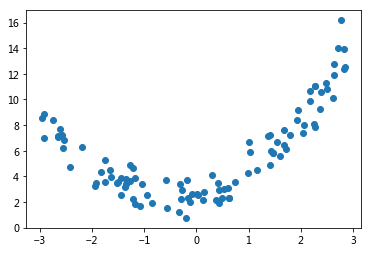

In [106]:
# np.seed(10)
x = np.random.uniform(-3, 3, size=100)
X=x.reshape(-1,1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

[array([0.94762707, 0.93872478]), 2.7112493127351276]

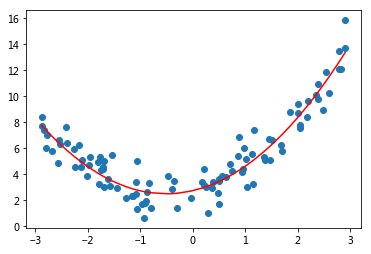

In [38]:
X2=np.hstack([X, X**2])#按列进行数组堆叠
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X2,y)
y_pred2=lr.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred2[np.argsort(x)],color='r')
[lr.coef_,lr.intercept_]

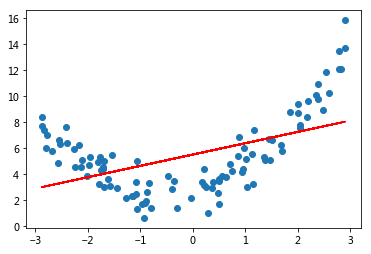

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [178]:
x = np.random.uniform(-3, 3, size=100)
X=x.reshape(-1,1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [179]:
X_train, X_test, y_train, y_test=train_test_split(X,y)
def PolynomialRegression(degree):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('lin_reg',LinearRegression())
    ])
    return pipeline

def ModelFit(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('MSE:%s' %mean_squared_error(y_pred,y_test))
    plot_x=np.linspace(-3,3,100).reshape(100,1)
    plot_y=model.predict(plot_x)
    plt.scatter(X,y)
    plt.axis([-3,3,0,10])#显示x,y轴范围
    plt.plot(plot_x[:,0],plot_y,color='r')
    plt.show()

MSE:1.9333953093217287


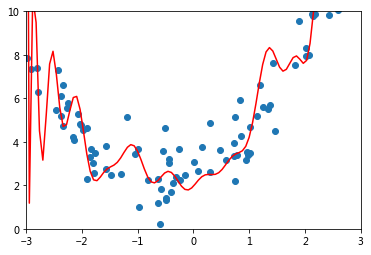

In [180]:
ModelFit(PolynomialRegression(30))

MSE:1.0764070810604536


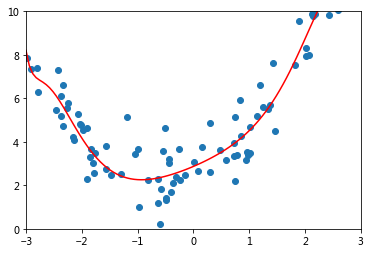

In [181]:
def LassoRegression(degree,alpha):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('lasso',Lasso(alpha))
    ])
    return pipeline
ModelFit(LassoRegression(30,0.01))

MSE:1.3303485050810397


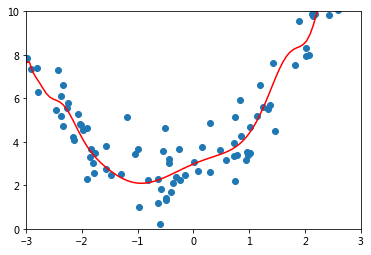

In [184]:
def RidgeRegression(degree,alpha):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('ridge',Ridge(alpha))
    ])
    return pipeline
ModelFit(RidgeRegression(30,0.01))

MSE:9.12076167469837


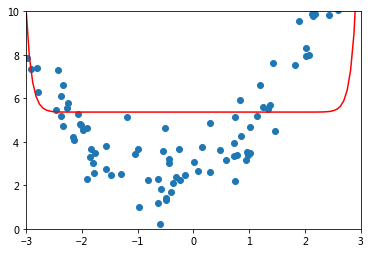

In [185]:
def LassoRegression2(degree):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('reg',LassoCV(eps=0.01,cv=3))#可以自动找到最佳alpha值，model.alpha_
    ])
    return pipeline

ModelFit(LassoRegression2(30))

## boosting 实战

In [74]:
data=datasets.load_boston()

In [75]:
train_x,test_x,train_y,test_y=train_test_split(data.data,data.target,test_size=0.3)

In [76]:
ada=AdaBoostRegressor()
ada.fit(train_x,train_y)
pred_ada=ada.predict(test_x)
print('AdaBoost MSE:%.4f'% mean_squared_error(pred_ada,test_y))

AdaBoost MSE:15.6197


In [77]:
gbdt=GradientBoostingRegressor()
gbdt.fit(train_x,train_y)
pred_gbdt=gbdt.predict(test_x)
print('GBDT MSE:%.4f'% mean_squared_error(pred_gbdt,test_y))

GBDT MSE:9.9653


### feature importance排序

Text(0.5, 1.0, 'Variable Importance of Adaboost')

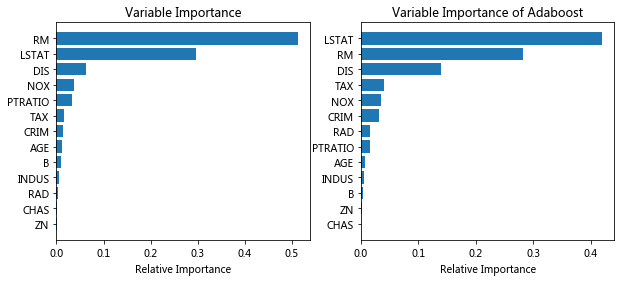

In [104]:
plt.figure(figsize=(10,4))
plt.subplot(121)
idx=np.argsort(gbdt.feature_importances_)
plt.barh(data.feature_names[idx],sorted(gbdt.feature_importances_))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.subplot(122)
idx1=np.argsort(ada.feature_importances_)
plt.barh(data.feature_names[idx1],sorted(ada.feature_importances_))
plt.xlabel('Relative Importance')
plt.title('Variable Importance of Adaboost')